# Modelization of Online News Popularity

## Download the data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('OnlineNewsPopularity.csv', encoding='UTF-8')
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## Clean the data

In [3]:
#Remove space in columns name
data.columns = data.columns.str.strip()

data = data.drop(['url','timedelta'], axis=1)
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## Format the data

Let's split and normalize our data set in 2, our data for the training and the data for the testing

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()
numerical = ['n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_self_hrefs', 'num_imgs','num_videos','average_token_length','num_keywords','self_reference_min_shares','self_reference_max_shares','self_reference_avg_sharess']

scaled_data = data

scaled_data[numerical] = scaler.fit_transform(data[numerical])

In [6]:
y = scaled_data.pop('shares')
X = scaled_data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [7]:
from sklearn.metrics import accuracy_score

## Convert the problem to a classfication problem

I'm converting the share variable to a qualitative variable because our goal is to determine if an article is popular or not.
They determined that an article was popular if the number of shares was over 1400.

In [10]:
def converter(x):
    x.astype(str)
    for index, value in x.items():
        if int(value) >= 1400:
            x[index] = 'popular'
        else:
            x[index] = 'unpopular'
    return x

class_y_train = y_train
class_y_test = y_test

class_y_train = converter(y_train)
class_y_test = converter(y_test)

## Logistic Regression

Now that we have classes we can try our logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [12]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train, class_y_train)

logistic_prediction = logistic_model.predict(X_test)
logistic_prediction_proba = logistic_model.predict_proba(X_test)

In [13]:
logistic_acc = accuracy_score(y_test, logistic_prediction)
print('Accuracy : ' + str(logistic_acc))
print('AUC : ' + str(roc_auc_score(y_test, logistic_prediction_proba[:, 1])))

Accuracy : 0.6226510278723673
AUC : 0.6468192183691122


There is an accuracy of ~ 60% which is just a bit better than random. I am not quite satisfied with this result, let's try more model.

## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [15]:
tree_model = DecisionTreeClassifier()

tree_model.fit(X_train, class_y_train)

tree_prediction = tree_model.predict(X_test)

In [16]:
tree_acc = accuracy_score(y_test, tree_prediction)
print('Accuracy : ' + str(tree_acc))

Accuracy : 0.5768697187539412


The accuracy is actually worse...

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
forest_model = RandomForestClassifier()

forest_model.fit(X_train, class_y_train)

forest_prediction = forest_model.predict(X_test)

In [19]:
forest_acc = accuracy_score(y_test, forest_prediction)
print('Accuracy : ' + str(forest_acc))

Accuracy : 0.665531592886871


Nice our best result yet ! 

## Boosting

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
boosting_model = GradientBoostingClassifier()

boosting_model.fit(X_train, class_y_train)

boosting_prediction = boosting_model.predict(X_test)
boosting_prediction_proba = boosting_model.predict_proba(X_test)

In [22]:
boosting_acc = accuracy_score(y_test, boosting_prediction)
print('Accuracy : ' + str(boosting_acc))

Accuracy : 0.6771345693025602


Let's try making a ROC Curve and calculate the AUC

AUC : 0.7379796329220663


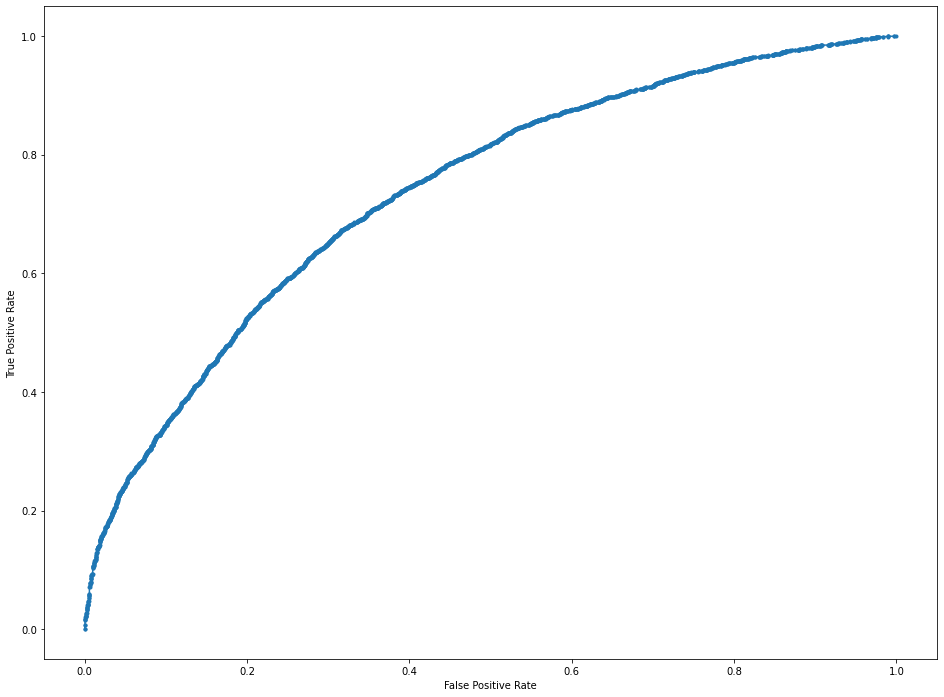

In [23]:
print('AUC : ' + str(roc_auc_score(y_test, boosting_prediction_proba[:,1])))

f = plt.figure(figsize=(16, 12))
bm_fpr, bm_tpr, _ = roc_curve(y_test, boosting_prediction_proba[:,0], pos_label='popular')

plt.plot(bm_fpr, bm_tpr, marker='.', label='Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

It is quite good result :)

## Ada Boost

In [24]:
from sklearn.ensemble import AdaBoostClassifier

In [25]:
ada_model = AdaBoostClassifier()

ada_model.fit(X_train, class_y_train)

ada_prediction = ada_model.predict(X_test)

In [26]:
ada_acc = accuracy_score(y_test, ada_prediction)
print('Accuracy : ' + str(ada_acc))

Accuracy : 0.6683062176819271


The result is a bit lower. Finnally let's try K-Nearest Neighbor

## K-NN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn_model = KNeighborsClassifier()

knn_model.fit(X_train, class_y_train)

knn_prediction = knn_model.predict(X_test)

In [29]:
knn_acc = accuracy_score(y_test, ada_prediction)
print('Accuracy : ' + str(knn_acc))

Accuracy : 0.6683062176819271


I will now try to optimize the Boosting model

## Tuning of Boosting

I will try to find the most optimal hyper-parameters with a grid search. I will first try to optimize the learning rate and n estimators, since they are connected parameters.

In [30]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import time

In [54]:
parameters = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

boostingGS_model = GridSearchCV(estimator=GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), param_grid = parameters, scoring='accuracy',n_jobs=4, cv=5)

boostingGS_model.fit(X_train, class_y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=4,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...ge=None,
         

In [55]:
boostingGS_prediction = boostingGS_model.predict(X_test)

print('Accuracy : ' + str(accuracy_score(y_test, boostingGS_prediction)))

Accuracy : 0.6733509900365746


In [57]:
print("Best parameters : " + str(boostingGS_model.best_params_))
print("Score get on train test with grid search : " + str(boostingGS_model.best_score_))
print("Best parameters are : {'learning_rate': 0.01, 'n_estimators': 1500}")

Best parameters : {'learning_rate': 0.01, 'n_estimators': 1500}
Score get on train test with grid search : 0.6697777077092859
Best parameters are : {'learning_rate': 0.01, 'n_estimators': 1500}


In [59]:
parameters = {'max_depth':[2,3,4,5,6,7]}

boostingGS_model_2 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.01,n_estimators=1500, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), param_grid = parameters, scoring='accuracy',n_jobs=4, cv=5)

tic = time.perf_counter()
boostingGS_model_2.fit(X_train, class_y_train)
toc = time.perf_counter()


In [60]:
boostingGS_prediction_2 = boostingGS_model_2.predict(X_test)

print('Accuracy : ' + str(accuracy_score(y_test, boostingGS_prediction_2)))

Accuracy : 0.6734771093454408


In [62]:
print("Best parameters : " + str(boostingGS_model_2.best_params_))
print("Score get on train test with grid search : " + str(boostingGS_model_2.best_score_))
print('Time taken in seconds : ' + str(toc - tic))
print("Best parameter is : {'max_depth': 5}")

Best parameters : {'max_depth': 5}
Score get on train test with grid search : 0.6712911871354248
Time taken in seconds : 493.2100721000006


In [63]:
parameters = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}

boostingGS_model_3 = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=5, subsample=1,max_features='sqrt', random_state=10), param_grid = parameters, scoring='accuracy',n_jobs=4, cv=5)
tic = time.perf_counter()
boostingGS_model_3.fit(X_train, class_y_train)
toc = time.perf_counter()

In [64]:
boostingGS_prediction_3 = boostingGS_model_3.predict(X_test)

print('Accuracy : ' + str(accuracy_score(y_test, boostingGS_prediction_3)))

Accuracy : 0.6723420355656451


In [66]:
print("Best parameters : " + str(boostingGS_model_3.best_params_))
print("Score get on train test with grid search : " + str(boostingGS_model_3.best_score_))
print('Time taken in seconds : ' + str(toc - tic))
print("Best parameters are : {'min_samples_leaf': 9, 'min_samples_split': 60}")

Best parameters : {'min_samples_leaf': 9, 'min_samples_split': 60}
Score get on train test with grid search : 0.6713857795995585
Time taken in seconds : 3720.7926217000004
Best parameters is : {'min_samples_leaf': 9, 'min_samples_split': 60}


In [67]:
parameters = {'max_features':[2,3,4,5,6,7], 'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

boostingGS_model_4 = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=5, random_state=10, min_samples_leaf=9, min_samples_split=60), param_grid = parameters, scoring='accuracy',n_jobs=4, cv=5)
tic = time.perf_counter()
boostingGS_model_4.fit(X_train, class_y_train)
toc = time.perf_counter()

In [68]:
boostingGS_prediction_4 = boostingGS_model_4.predict(X_test)

print('Accuracy : ' + str(accuracy_score(y_test, boostingGS_prediction_4)))

Accuracy : 0.6732248707277084


In [69]:
print("Best parameters : " + str(boostingGS_model_4.best_params_))
print("Score get on train test with grid search : " + str(boostingGS_model_4.best_score_))
print('Time taken in seconds : ' + str(toc - tic))
print("Best parameters are : {'max_features': 4, 'subsample': 0.75}")

Best parameters : {'max_features': 4, 'subsample': 0.75}
Score get on train test with grid search : 0.6719848652057386
Time taken in seconds : 2098.1445618
Best parameters are : {'min_samples_leaf': 9, 'min_samples_split': 60}


After all the optimization I've made we get our best accurracy of 0.6719, our yet best accuracy was 0.669 so we improve :)

## Final model

Here is our final model, with the best parametrs I've found.

In [31]:
from sklearn.metrics import precision_score

In [32]:
best_model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=5, random_state=10, min_samples_leaf=9, min_samples_split=60, max_features=4, subsample=0.75)

best_model.fit(X_train, class_y_train)

best_model_prediction = best_model.predict(X_test)
best_model_prediction_proba = best_model.predict_proba(X_test)

In [33]:
best_model_acc = accuracy_score(y_test, best_model_prediction)

print('Accuracy : ' + str(best_model_acc))
print('AUC : ' + str(roc_auc_score(y_test, best_model_prediction_proba[:,1])))

Accuracy : 0.6830621768192711
AUC : 0.7447020856148643


# Conclusion

I manage to get an accuracy level of 68.3% which is better than the original study since their best model get an accuracy of 67,~% and an AUC score of 73.~% and I have an AUC score of 74.47%

Let's now plot all the accuracy I get during this study

In [34]:
model_label = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Boosting', 'Ada Boost', 'K-NN', 'Opti Bossting']
model_acc = [logistic_acc, tree_acc, forest_acc, boosting_acc, ada_acc, knn_acc, best_model_acc]

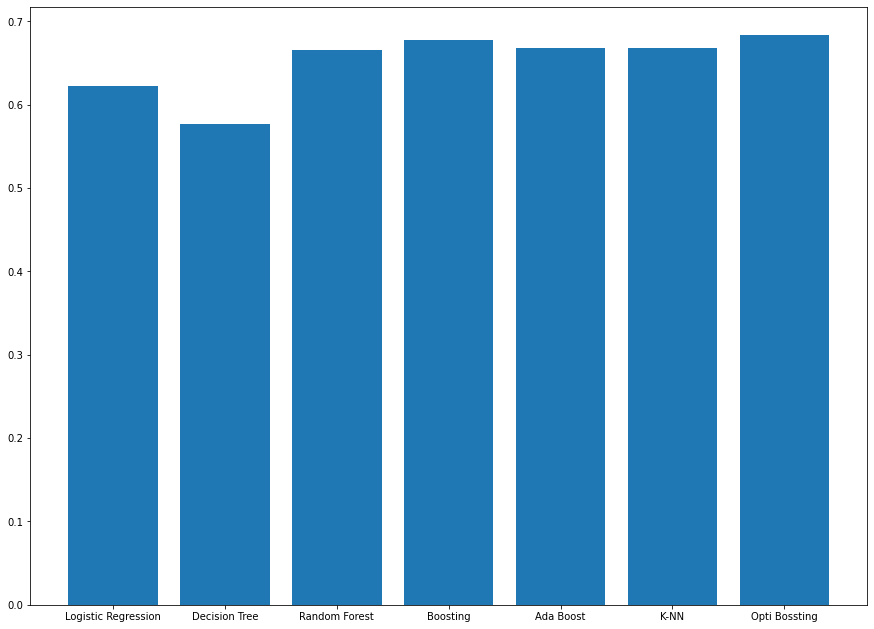

In [35]:
f = plt.figure(figsize=(15, 11))

plt.bar(model_label, model_acc)
plt.show()

As we can see we can't get an accuracy over 0.68 with tuning. We probably can't go any higher

## Most important feature

Let's determine what is the most import feature :)

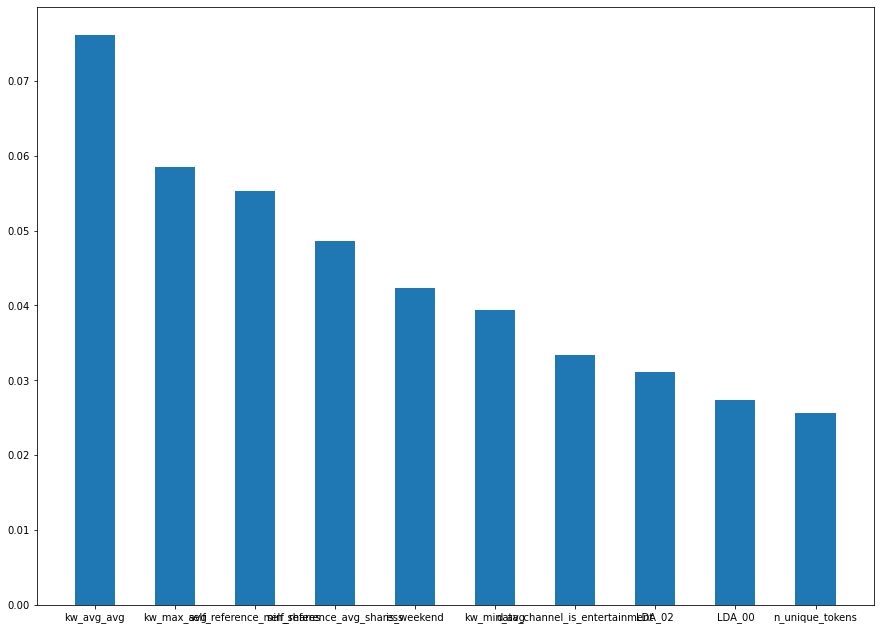

In [36]:
#I will create a dictionnary containing the label and the value so that I can sort them later

features_importance_label = {X_test.columns[i]:best_model.feature_importances_[i] for i in range(58)}

features_importance_label = {k: v for k, v in sorted(features_importance_label.items(), key=lambda item: item[1], reverse=True)}

f = plt.figure(figsize=(15, 11))

plt.bar(list(features_importance_label.keys())[:10], list(features_importance_label.values())[:10], width=0.5)

plt.show()

The most important features is also the keyword features. The same as in the study.

## Saving the model

Let's now save our best model to a pickle file so that our API can load it and use it later.

In [37]:
import pickle

In [38]:
pickle.dump(best_model, open('model.sav', 'wb'))